In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
data = data.iloc[:,2:]

In [ ]:
data.sample(6)

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,70,27,0,36.8,0.340,27,0
439,88,0,0,36.8,0.727,31,0
390,66,29,196,32.0,0.444,42,0
479,86,31,0,28.0,0.419,63,0
152,86,28,155,34.3,1.189,42,1
493,70,18,122,28.9,1.144,45,1


In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop("Outcome", axis = 1), data["Outcome"], test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape

((614, 6), (154, 6))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler.mean_

array([69.22638436, 20.6237785 , 82.13680782, 32.20667752,  0.46647068,
       33.59446254])

In [ ]:
x_train

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,78,29,126,35.2,0.692,54
118,60,23,0,28.2,0.443,22
247,90,33,680,52.3,0.427,23
157,56,21,135,25.2,0.833,23
468,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...
763,76,48,180,32.9,0.171,63
192,66,0,0,30.4,0.383,36
629,65,22,0,24.7,0.148,21
559,74,0,0,30.1,0.300,35


In [ ]:
x_train_scaled

array([[ 0.44912368,  0.52222619,  0.3736349 ,  0.37852648,  0.67740401,
         1.69955804],
       [-0.47230103,  0.14814855, -0.69965674, -0.50667229, -0.07049698,
        -0.96569189],
       [ 1.06340683,  0.77161128,  5.09271083,  2.54094063, -0.11855487,
        -0.88240283],
       ...,
       [-0.21634972,  0.08580228, -0.69965674, -0.94927168, -0.95656442,
        -1.04898095],
       [ 0.24436264, -1.28581572, -0.69965674, -0.26640405, -0.50001442,
         0.11706589],
       [ 0.65388473, -1.28581572, -0.69965674, -4.07275877,  0.52121586,
         2.94889395]])

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_train_scaled

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.449124,0.522226,0.373635,0.378526,0.677404,1.699558
1,-0.472301,0.148149,-0.699657,-0.506672,-0.070497,-0.965692
2,1.063407,0.771611,5.092711,2.540941,-0.118555,-0.882403
3,-0.677062,0.023456,0.450299,-0.886043,1.100914,-0.882403
4,-3.543717,-1.285816,-0.699657,-0.279050,-0.851438,0.366933
...,...,...,...,...,...,...
609,0.346743,1.706805,0.833617,0.087675,-0.887481,2.449160
610,-0.165159,-1.285816,-0.699657,-0.228467,-0.250714,0.200355
611,-0.216350,0.085802,-0.699657,-0.949272,-0.956564,-1.048981
612,0.244363,-1.285816,-0.699657,-0.266404,-0.500014,0.117066


In [ ]:
np.round(x_train.describe(), 1)

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.0,614.0,614.0,614.0,614.0,614.0
mean,69.2,20.6,82.1,32.2,0.5,33.6
std,19.6,16.1,117.5,7.9,0.3,12.0
min,0.0,0.0,0.0,0.0,0.1,21.0
25%,62.0,0.0,0.0,27.5,0.2,24.0
50%,72.0,23.0,37.0,32.4,0.4,29.0
75%,80.0,32.8,130.0,36.8,0.6,41.0
max,122.0,99.0,846.0,67.1,2.4,81.0


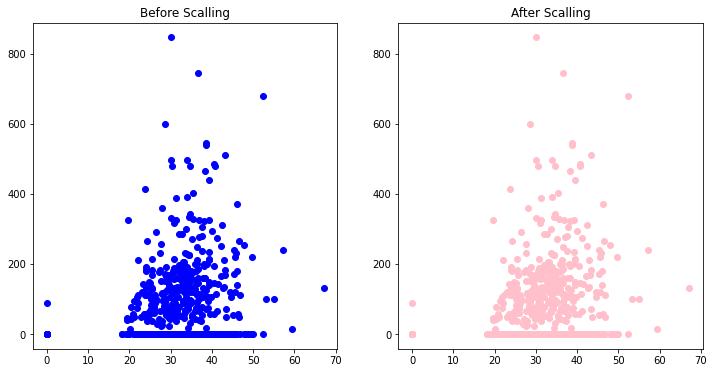

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6))
ax1.scatter(x_train["BMI"], x_train["Insulin"], color = "blue")
ax1.set_title("Before Scalling")

ax2.scatter(x_train["BMI"], x_train["Insulin"], color = "pink")
ax2.set_title("After Scalling")
plt.show()